# MI-SPI - Domácí úkol 1.
---
#### Skupina: 
    - Vojtěch Polcar (polcavoj, paralelka 108) - reprezentant
    - Anna Moudrá (moudrann, paralelka 102)

Nejprve určíme parametry pro výpočet hodnot, které určí soubory pro vypracování úkolů.

In [1]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [14]:
k = 20
l = 6
x = ((k*l*23) % 20) + 1

str_X = (3 - len(str(x)))*'0'+ str(x) + '.txt'

print("Vstupní soubor:", str_X)

Vstupní soubor: 001.txt


---
### 1) Z datového souboru načtěte text k analýze. Odhadněte pravděpodobnosti písmen (včetně mezer), které se v textu vyskytují. Takto získané empirické rozdělení graficky znázorněte. 

V této úloze nejprve načteme text ze souboru k analýze a rozdělíme ho na jednotlivé znaky. Poté projdeme celý text a jednotlivé znaky sečteme. Tyto hodnoty nakonec vydělíme celkovým počtem znaků, z čehož dostaneme pravděpodobnost výskytu znaků v textu. Pravděpodobnost znaků je získána ze vzorce:
$$P(c)=\frac{m}{n}$$ kde c je aktuální znak, m je počet zastoupení znaku v textu a n je celkový počet všech znaků.

In [3]:
f = open('./hw1-source/'+str_X, 'r')
X_info = f.readline()
data_X = f.read()
f.close()

print('Název textu:', X_info)

Název textu: Pierrot, Dog of Belgium, by Walter A. Dyer



In [4]:
x_uni = np.array(list(data_X[:]))
x_uni = np.unique(x_uni, return_counts=True)
print(x_uni)

(array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z'], dtype='<U1'), array([1199,  438,   96,  102,  303,  659,  137,  141,  337,  297,   15,
         52,  249,  109,  355,  399,   91,    6,  350,  291,  436,  159,
         30,  117,    1,   83,    6]))


In [5]:
chars_x = pd.DataFrame()
chars_x['char'] = x_uni[0]
chars_x['count'] = x_uni[1]
chars_x['prob'] = chars_x['count']/(np.sum(x_uni[1]))

chars_x.char = chars_x.char.replace(" ", 'space')

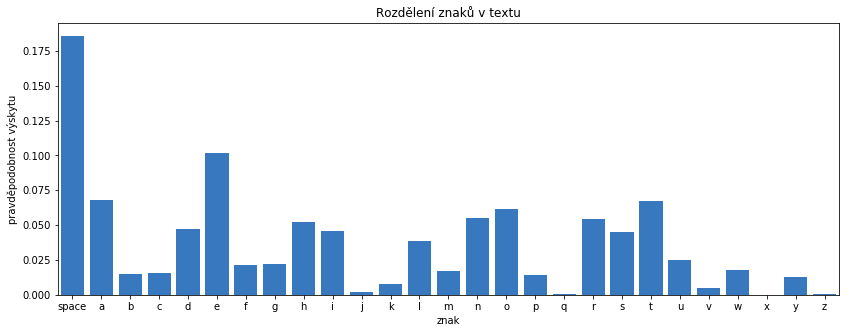

In [6]:
colors = ["#3778bf","#feb308"]
plt.figure(figsize=(14,5))
sns.barplot(x='char', y='prob', data=chars_x, color=colors[0], saturation=1)
plt.title("Rozdělení znaků v textu"),plt.xlabel("znak"),plt.ylabel("pravděpodobnost výskytu")
plt.show()

#### Diskuze k výsledku
Z grafu můžeme vidět, že rozdělení písmen odpovídá tomu, že je text v anglickém jazyce. Pokud nebudeme počítat mezery, tak jsou v něm nejčastějšími znaky právě písmena e, t, a, což potvrzuje i graf.

#### Pro další body předpokládejme, že je text vygenerován z homogenního markovského řetězce s diskrétním časem.

### 2) Za tohoto předpokladu odhadněte matici přechodu.
Z načtého textu odhadneme matici přechodu. Protože předpokládáme, že je text vygenerován z homogenního markovského řetězce, získáme matici tak, že projdeme text a pro každý znak se podíváme na jeho následníka. To můžeme udělat protože předchozí předpoklad nám říká, že nezávisí na tom, jaké následníky měl znak dříve, ale zajímá nás pouze aktuální stav.

V řešení níže projdeme zadaný text a pro každý znak vytvoříme pravděpodobnost přechodu na všechny znaky. Pravděpodobnost každého přechodu odhadneme pomocí vzorce:
$$P(M_{i+1}= d | M_i = c)=\frac{m}{n}$$ kde c je aktuální znak, d je následující znak, m je počet výskytů znaku d za znakem c a n je počet všech výskytů znaku c (neboli počet všech následníků).

In [17]:
# UDĚLAT OBŘÍ MATICI - NASČÍTAT CO JDE ZA JAKYM ZNAKEM A UDĚLAT Z TOHO PRAVDĚPODOBNOSTI
chars = chars_x.char.unique()
#print(chars)
P = pd.DataFrame(index=chars, columns=chars)


def fillP(df, text, alphabet):
    for a in alphabet:
        char = a
        if char == 'space':
            char = " "
        indexes = [int(index+1) for index, value in enumerate(text) if value == char]
        found = [text[i] for i in indexes if i < len(text)]
        for b in df.columns:
            after_char = b
            if after_char == 'space':
                after_char = " "
            if(after_char in set(found)):
                after_char_prob = found.count(after_char)/len(found)
                df[b][a] = after_char_prob
            else:
                df[b][a] = 0
            
        
            
fillP(P, data_X,chars)
#display(P.head())
print("Test (součet řádků): ")
print(P.sum(axis=1))

Test (součet řádků): 
space    1.0
a        1.0
b        1.0
c        1.0
d        1.0
e        1.0
f        1.0
g        1.0
h        1.0
i        1.0
j        1.0
k        1.0
l        1.0
m        1.0
n        1.0
o        1.0
p        1.0
q        1.0
r        1.0
s        1.0
t        1.0
u        1.0
v        1.0
w        1.0
x        1.0
y        1.0
z        1.0
dtype: float64


In [8]:
P.to_csv("matice_prechodu.csv")

#### Diskuze k výsledku
Výsledkem předchozích výpočtů je matice o velikosti 27x27. Pro přehlednost je matice vyexportovaná do souboru "matice_prechodu.csv".
Pro kontrolu byl proveden i součet pravděpodobností jednotlivých řádků. Ten správně vyšel pro každý řádek roven 1.

#### 3) Na základě matice z předchozího bodu najděte stacionární rozdělení tohoto řetězce.
Stacionární rozdělení řetězce najdeme na základě matice z předchozího příkladu. Stacionární rozdělení $\pi$ je řešením soustavy rovnice $\pi=\pi*P$. Tuto soustavu rovnic si upravíme na: $ \pi - \pi*P = 0$ a následně na $ \pi*(I - P) = 0$, kde $I$ je jednotková matice. Dále víme, že $ \sum \pi = 1$. 

Soustavu nyní můžeme napsat ve tvaru Ax = b, kde b je transponovaný vektor $(0,\dots,0,1)$ a A je matice $ \pi*(I - P) $ s přidaným posledním řádkem, reprezentujícím vektor $\pi - (\pi_0, \pi_1,\dots,\pi_{26})$.

In [13]:
""" 
pi = pi*P 
soustava rovnic kde vektor pi je resenim soustavy:
        pi( I - P ) == 0   upravena rovnice
        sum(pi) == 1
        
        tuto soustavu muzeme napsat ve tvaru Ax = b
        kde b.T = [0,..,0,1]
        a A = [[
                
                    pi( I - P )
                        
                                  ]
                [ pi0 + .. + pi26 ]]
"""
def stationary(P):
    rows = P.shape[0] # velikost vektoru pi
    a = np.eye(rows) - P # I - P # vektor levych stran
    a = np.vstack( (a.T, np.ones(rows)) ) # pridani sum(pi) == 1
    # v promenne a je ted matice A v soustave Ax = b
    b_vect = np.zeros(rows+1) # vektor pravych stran b
    b_vect[-1] = 1 # 0 pro kazdou rovnici  pi( I - P ) a 1 pro sum(pi) == 1
    pi = np.linalg.lstsq( a.astype(float), np.matrix(b_vect, dtype = 'float').T , rcond=None ) #reseni sustavy rovnic
    return [i[0] for i in pi[0].tolist()] #prevod 2D listu do vektoru reseni
    

P_matrix = P.values
p_stationary = stationary(P)
print("Stationary:",p_stationary)

print("\nKontrolní součet:",np.sum(p_stationary)) #kontrolni soucet

Stationary: [0.18570145528394705, 0.06783413051436557, 0.014868368795939646, 0.015796940837522255, 0.04692576751394258, 0.10205425965931908, 0.021216882050768715, 0.021843746900416038, 0.05215764575441392, 0.04599409450396163, 0.00232320419454483, 0.008053552592696462, 0.038557951783603245, 0.01688022014058139, 0.054979412400881736, 0.061783587274558446, 0.014093962454750886, 0.0009294701178297338, 0.054219534943122406, 0.04508217464800904, 0.06736804148266043, 0.02462805399717019, 0.004645995127833057, 0.01812015989003305, 0.00015486230600811335, 0.012857372099992197, 0.0009291527311291806]

Kontrolní součet: 1.0000000000000009


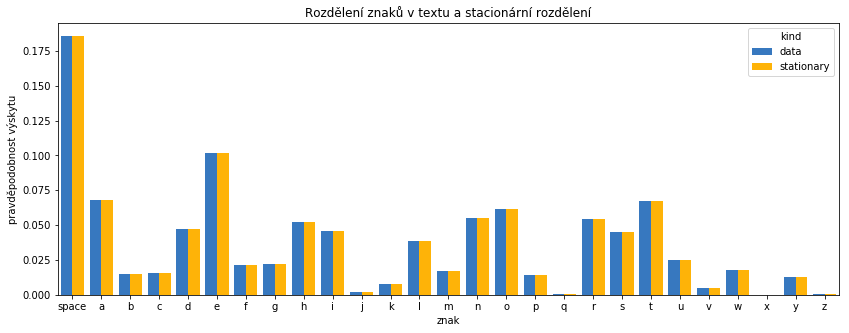

In [18]:
#print(chars)
count = len(chars)
df = pd.DataFrame(data = {'char': list(chars)+list(chars),'values': list(chars_x.prob)+p_stationary, 'kind': list(['data']*count+['stationary']*count)})
plt.figure(figsize=(14, 5))
sns.barplot(x='char', hue="kind", y="values", data=df, palette = colors, saturation=1.)
plt.title("Rozdělení znaků v textu a stacionární rozdělení"),plt.xlabel("znak"),plt.ylabel("pravděpodobnost výskytu")
plt.show()

#### Diskuze k výsledku
Pro výsledný vektor stacionárního rozdělení jsme provedli kontrolní součet, zda se $\sum_{i=0}^{26} \pi_i$ rovná 1. Malá odchylka 1.0000000000000009 je způsobena sčítáním malých čísel s omezenou desetinnou přesností. Výsledný vektor $\pi$ je skutečně stacionárním rozdělením.

### 4) Porovnejte stacionární rozdělení se získaným empirickým rozdělením. Tj. na hladině 5% otestujte hypotézu, že se empirické rozdělení z bodu 1 rovná stacionárnímu rozdělení.
Pro otestování hypotézy použijeme test dobré shody $\chi^2$ při známých parametrech:
$$\chi^2 = \sum_{i=1}^k \frac{(N_i - np_i)^2}{np_i}$$

s kritickým oborem

$$\chi^2 \geq \chi^2_{\alpha,k-1}$$

Na hladině významnosti $5\%$ budeme testovat hypotézu:
- Rozdělení se rovnají: $H_0$: $p'=p$                      
- Rozdělení jsou rozdílná: $H_A$: $p'\neq p$      

In [19]:
s,p = stats.chisquare(chars_x.prob, p_stationary)
print("statistika:","%.8f" % s)
print("p_value:",p)

statistika: 0.00000037
p_value: 1.0


#### Diskuze k výsledku
Pokud je hladina významnosti $\alpha$ větší než $p$ hodnota testu, zamítáme $H_0$ ve prospěch $H_A$ na hladině $\alpha$.
V našem případě je $p$ hodnota testu rovna 1, tedy hypotézu $H_0$ **nezamítáme** a nezamítnuli bychom ji ani na hladině významnosti blížící se $100\%$.
Stejně tak můžeme porovnat Pearsonovu statistiku s hodnotou z tabulek kde $\chi^2_{0.05,26} = 38.885$ a opět vidíme, že se k rozhodnutí zamítnutí ani neblížíme.

